In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Fake News Detection Dataset.csv")

In [2]:
df.head(7)

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
0,1606,10,4,24,6.176750,1
1,3718,10,8,25,5.826770,1
2,2634,10,7,18,4.619040,1
3,5560,10,6,18,4.961424,1
4,7494,10,4,21,4.114324,1
5,3159,39,5,16,4.582874,1
6,7232,11,4,21,5.756046,1


In [3]:
filtered_data = df[(df['Unique_Words'] <= df['Word_Count'])]

In [4]:
filtered_data=filtered_data.reset_index(drop=True)

In [5]:
df=filtered_data.iloc[:,1:]

In [6]:
df

,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
0,39,5,16,4.582874,1
1,69,7,15,5.701358,1
2,85,5,25,4.170042,1
3,94,5,25,6.956862,1
4,27,5,23,4.194186,1
...,...,...,...,...,...
3788,41,7,12,6.963924,0
3789,100,5,15,3.136755,1
3790,100,8,18,3.376823,1
3791,85,14,42,5.331393,0


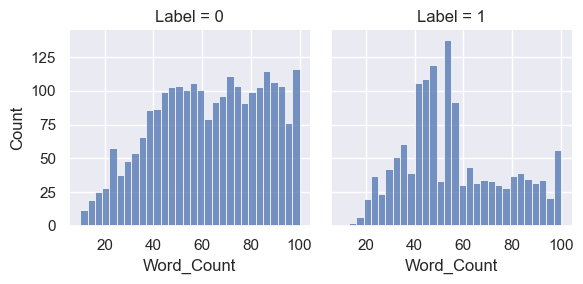

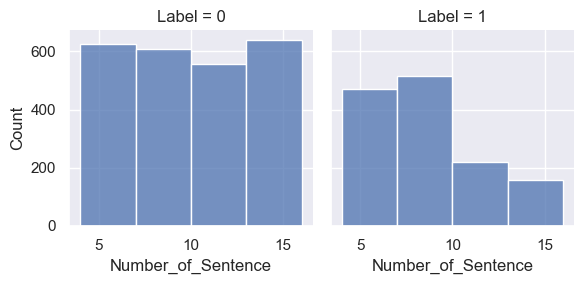

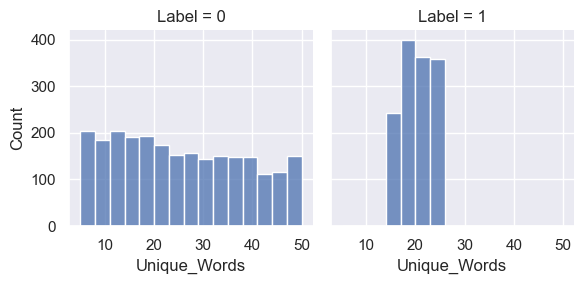

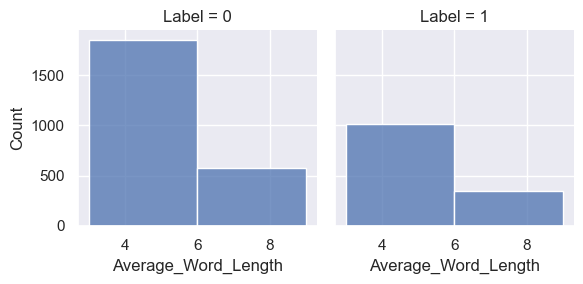

In [7]:
for i in df.iloc[:,:-1]:
    sns.set_theme(style="darkgrid")
    sns.displot(
    df, x=i, col="Label",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
   )

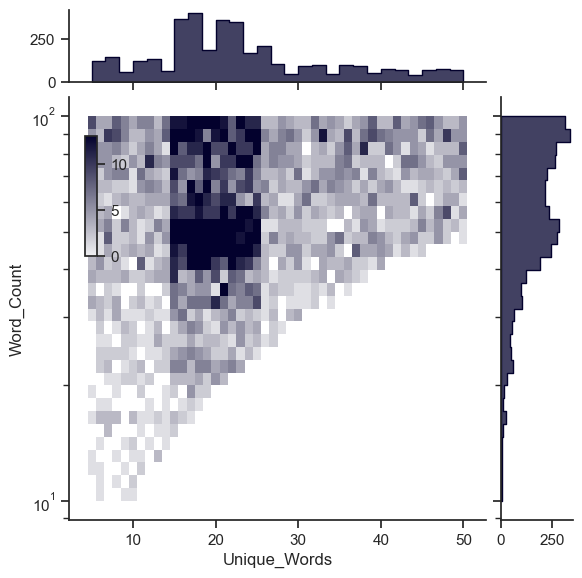

In [8]:
sns.set_theme(style="ticks")
g = sns.JointGrid(data=df, x="Unique_Words", y="Word_Count", marginal_ticks=True)
g.ax_joint.set(yscale="log")
cax = g.figure.add_axes([.15, .55, .02, .2])
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

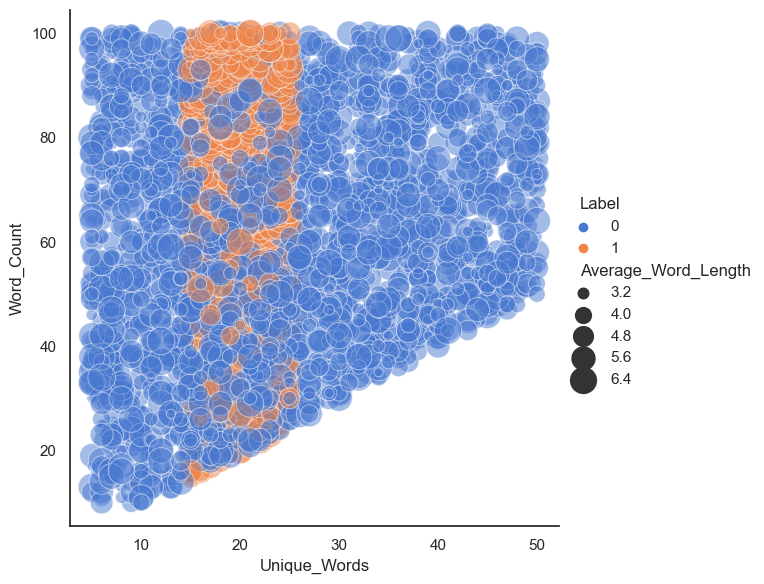

In [9]:
sns.set_theme(style="white")
sns.relplot(x="Unique_Words", y="Word_Count", hue="Label", size="Average_Word_Length",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

In [10]:
b = []
Word_Count=df["Word_Count"]
Unique_Words=df["Unique_Words"]
for i, j in zip(Word_Count.items(), Unique_Words.items()):
    _, word_count_value = i
    _, unique_words_value = j
    

    if word_count_value != 0: 
        percent_of_unique_words = ((unique_words_value / word_count_value) * 100)
    else:
        percent_of_unique_words = 0  
    b.append(percent_of_unique_words)


In [11]:
b=pd.DataFrame(b)

In [12]:
df["Percantage_of_Uniquies"]=b

In [13]:
df

,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label,Percantage_of_Uniquies
0,39,5,16,4.582874,1,41.025641
1,69,7,15,5.701358,1,21.739130
2,85,5,25,4.170042,1,29.411765
3,94,5,25,6.956862,1,26.595745
4,27,5,23,4.194186,1,85.185185
...,...,...,...,...,...,...
3788,41,7,12,6.963924,0,29.268293
3789,100,5,15,3.136755,1,15.000000
3790,100,8,18,3.376823,1,18.000000
3791,85,14,42,5.331393,0,49.411765


In [14]:
average_sentence_length=[]
Word_Count=df["Word_Count"]
Number_of_Sentence=df["Number_of_Sentence"]

for i, j in zip(Word_Count.items(), Number_of_Sentence.items()):
    _, word_count_value = i
    _, Number_of_Sentence_value = j
    

    if word_count_value != 0: 
        average_of_sentence_len = ((Number_of_Sentence_value / word_count_value) * 100)
    else:
        average_of_sentence_len = 0  
    average_sentence_length.append(average_of_sentence_len)


In [15]:
average_sentence_length=pd.DataFrame(average_sentence_length)

In [16]:
df["average_sentence_length"]=average_sentence_length

In [17]:
df.head(5)

,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label,Percantage_of_Uniquies,average_sentence_length
0,39,5,16,4.582874,1,41.025641,12.820513
1,69,7,15,5.701358,1,21.739130,10.144928
2,85,5,25,4.170042,1,29.411765,5.882353
3,94,5,25,6.956862,1,26.595745,5.319149
4,27,5,23,4.194186,1,85.185185,18.518519


In [18]:
corr_matrix=df.corr()
corr_matrix

,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label,Percantage_of_Uniquies,average_sentence_length
Word_Count,1.000000,0.001592,0.236198,0.002657,-0.153827,-0.560744,-0.666422
Number_of_Sentence,0.001592,1.000000,0.046541,-0.010758,-0.201872,0.003428,0.534889
Unique_Words,0.236198,0.046541,1.000000,-0.007190,-0.225628,0.587862,-0.198865
Average_Word_Length,0.002657,-0.010758,-0.007190,1.000000,0.010500,-0.010008,-0.017126
Label,-0.153827,-0.201872,-0.225628,0.010500,1.000000,-0.056463,-0.057285
Percantage_of_Uniquies,-0.560744,0.003428,0.587862,-0.010008,-0.056463,1.000000,0.402992
average_sentence_length,-0.666422,0.534889,-0.198865,-0.017126,-0.057285,0.402992,1.000000


In [19]:
from sklearn.feature_selection import f_classif
y = df['Label']
X = df.drop("Label",axis=1)

f_scores, p_values = f_classif(X, y)

for i, feature in enumerate(X.columns):
    print("Feature:", feature)
    print("F-score:", f_scores[i])
    print("p-value:", p_values[i])
    print("-----------------------------")
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor()

Feature: Word_Count
F-score: 91.87976871038967
p-value: 1.6121245465354161e-21
-----------------------------
Feature: Number_of_Sentence
F-score: 161.0556217335146
p-value: 3.585204396108706e-36
-----------------------------
Feature: Unique_Words
F-score: 203.34438013710417
p-value: 5.557436512367064e-45
-----------------------------
Feature: Average_Word_Length
F-score: 0.41797281837016764
p-value: 0.5179894423997908
-----------------------------
Feature: Percantage_of_Uniquies
F-score: 12.124724957691775
p-value: 0.0005031968428566814
-----------------------------
Feature: average_sentence_length
F-score: 12.48132663521828
p-value: 0.0004159420127911282
-----------------------------


In [20]:
df.insert(len(df.columns)-1, 'Label', df.pop('Label'))

In [21]:
df.drop("Average_Word_Length",axis=1)

,Word_Count,Number_of_Sentence,Unique_Words,Percantage_of_Uniquies,average_sentence_length,Label
0,39,5,16,41.025641,12.820513,1
1,69,7,15,21.739130,10.144928,1
2,85,5,25,29.411765,5.882353,1
3,94,5,25,26.595745,5.319149,1
4,27,5,23,85.185185,18.518519,1
...,...,...,...,...,...,...
3788,41,7,12,29.268293,17.073171,0
3789,100,5,15,15.000000,5.000000,1
3790,100,8,18,18.000000,8.000000,1
3791,85,14,42,49.411765,16.470588,0


C:\Users\SİNAN-PC\AppData\Local\Temp\ipykernel_22592\3314434950.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],fit=norm)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\SİNAN-PC\AppData\Local\Temp\ipykernel_22592\3314434950.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use th

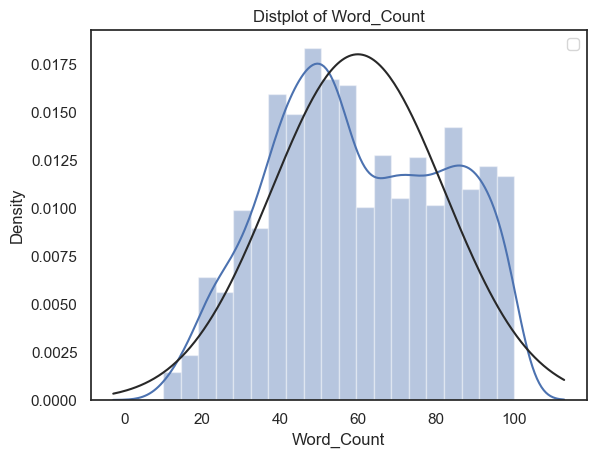

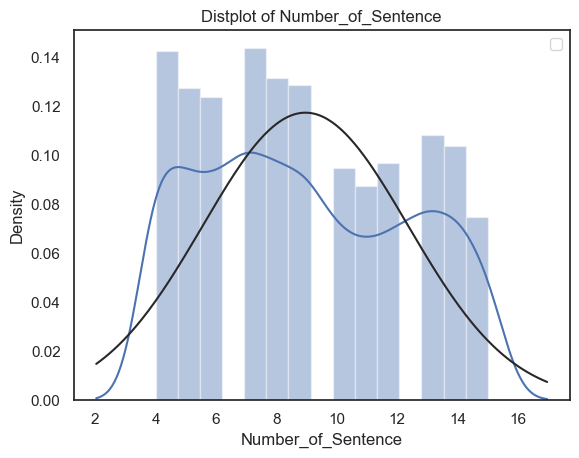

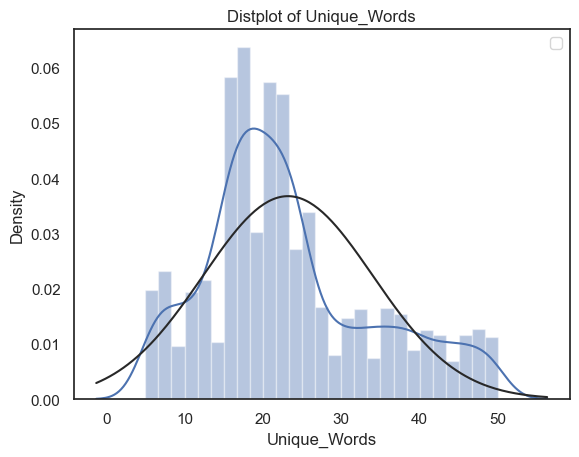

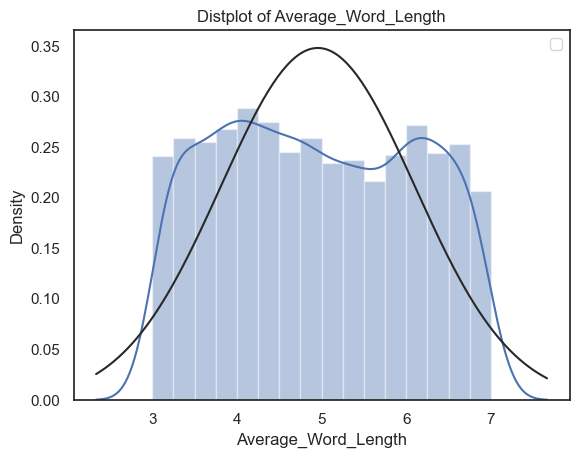

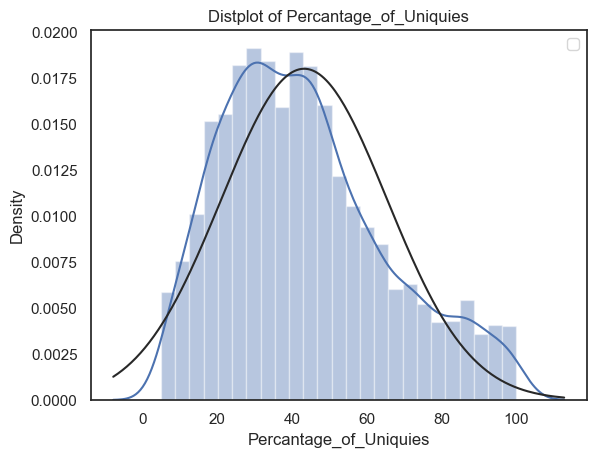

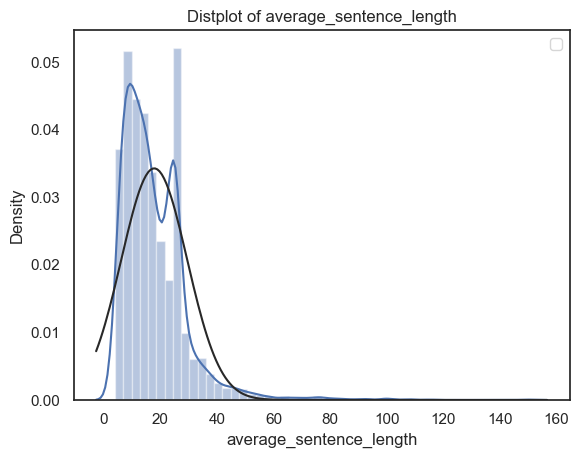

In [22]:
from scipy.stats import norm
for i in df.iloc[:,:-1]:
    plt.figure()
    
    sns.distplot(df[i],fit=norm)
    plt.legend()
    plt.title(f"Distplot of {i}")
    plt.xlabel(f"{i}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


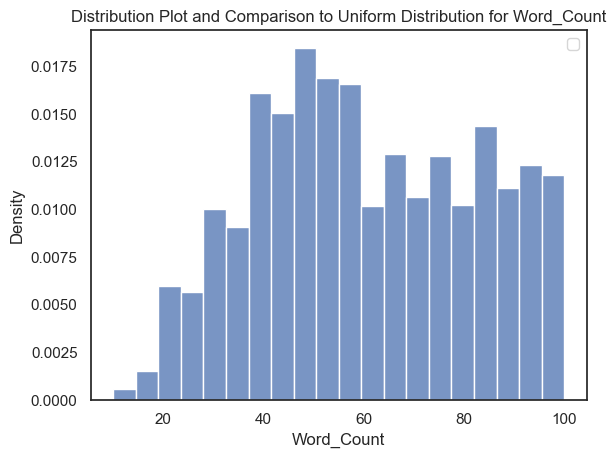

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


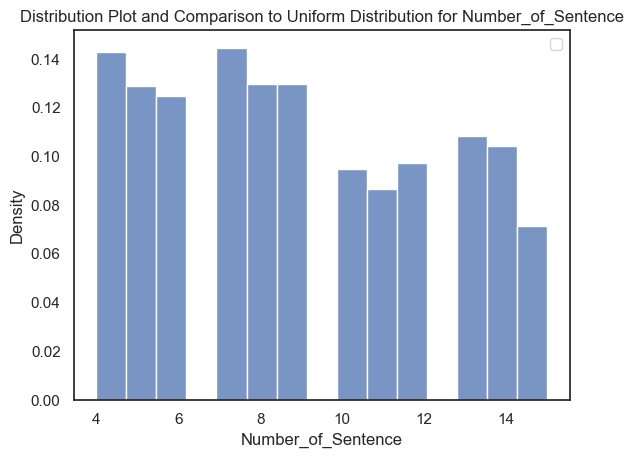

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


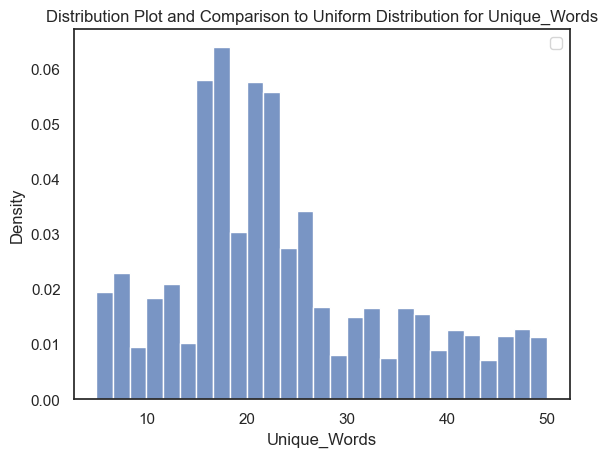

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


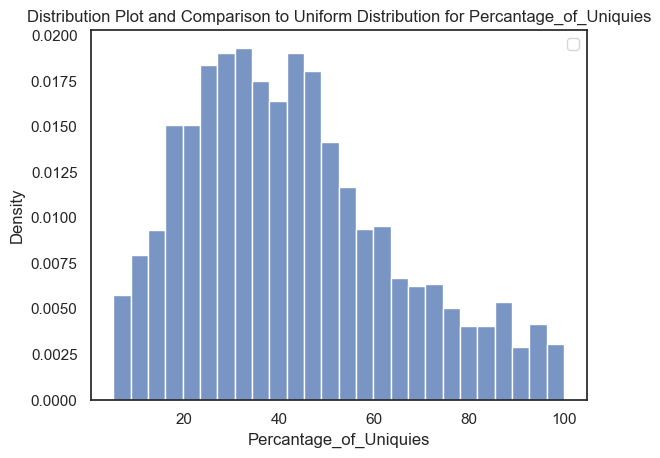

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


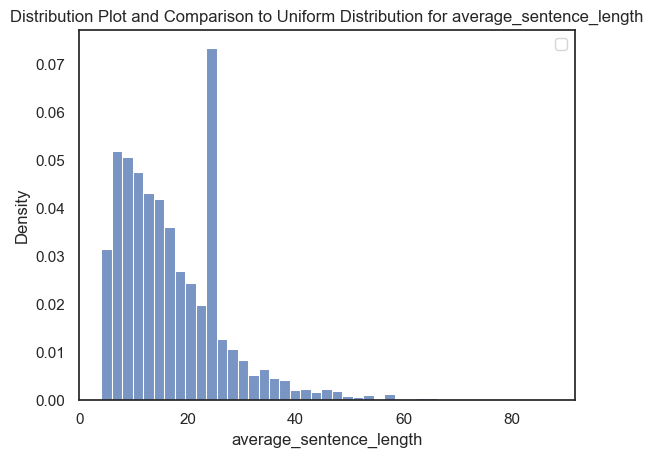

In [78]:

from scipy.stats import uniform
for i in df.iloc[:,:-1]:
    plt.figure()
    sns.histplot(df[i],kde=False,stat="density")
    a = df[i].min() 
    b = df[i].max()  
    x = np.linspace(a, b, 100)


    plt.title(f"Distribution Plot and Comparison to Uniform Distribution for {i}")
    plt.legend()
    plt.show()

In [24]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson", standardize=True)
y=df["Label"]
X=df.drop("Label",axis=1)
X=X.values
X_box_cox=pt.fit_transform(X)


In [25]:
X_box_cox.shape


(3793, 6)

In [26]:
from sklearn.model_selection import train_test_split
random_state=42
X_boxC_train,X_boxC_test,y_boxC_train,y_boxC_test=train_test_split(X_box_cox,y,test_size=0.33,random_state=random_state)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc=GradientBoostingClassifier()
model_gbc.fit(X_boxC_train,y_boxC_train)
y_pred=model_gbc.predict(X_boxC_test)

Text(0.5, 1.0, 'Confusion matrix of GradientBoostingClassifier')

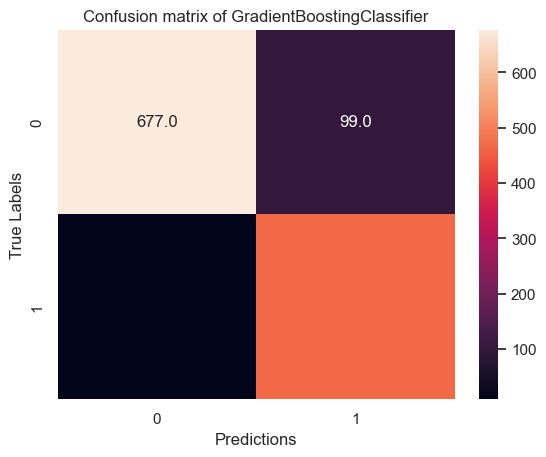

In [28]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm_boxC=confusion_matrix(y_boxC_test,y_pred)
sns.heatmap(cm_boxC,annot=True,fmt=".1f")
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.title("Confusion matrix of GradientBoostingClassifier")


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
model_performance = pd.DataFrame(columns=["model_name", "accuracy", "precision", "recall", "f1_score", "latency"])

def evaluate_model(model, features, labels, model_name=" " ):
    global model_performance
    start_time = time.time()
    predictions = model.predict(features)
    end_time = time.time()
    
   

    latency = round((end_time - start_time) * 1000, 1)
    accuracy = round(accuracy_score(labels, predictions), 3)
    precision = round(precision_score(labels, predictions, average='binary', zero_division=1), 3)
    recall = round(recall_score(labels, predictions), 3)

    f1 = round(f1_score(labels, predictions, average='binary', zero_division=1), 3)

    
    metrics = {
        "model_name": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "latency": latency
    }
    model_performance = pd.concat([model_performance, pd.DataFrame([metrics])], ignore_index=True)
    return metrics
    





In [35]:
evaluate_model(model_gbc,X_boxC_train,y_boxC_train,"model_gbc")

{'model_name': 'model_gbc',
 'accuracy': 0.923,
 'precision': 0.821,
 'recall': 0.999,
 'f1_score': 0.901,
 'latency': 4.0}

In [36]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,roc_curve
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(model, feats, labels,title):
    fpr, tpr, thresholds = roc_curve(labels, model.predict_proba(feats)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

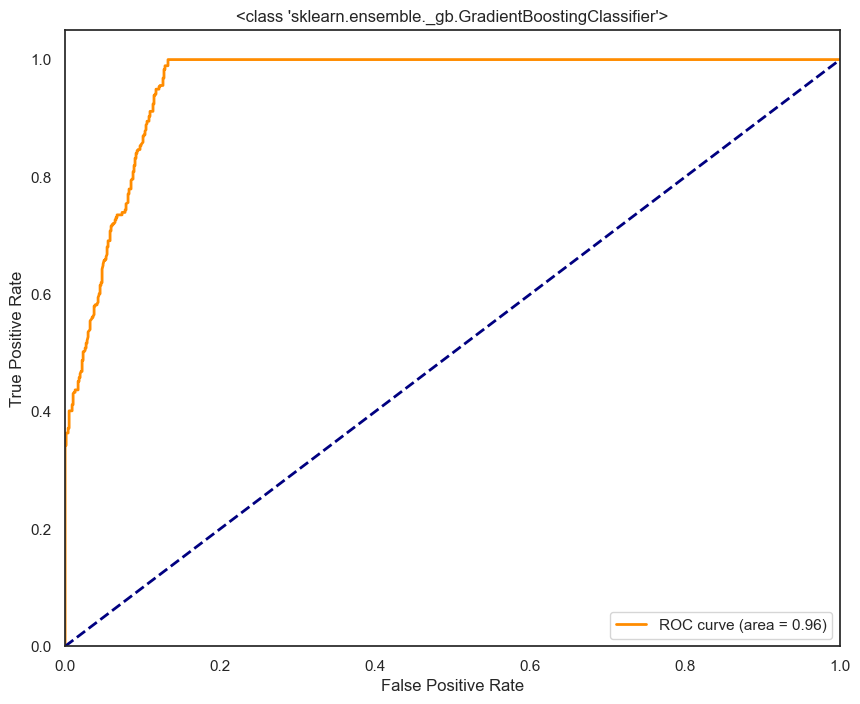

In [37]:

plot_roc_curve(model_gbc,X_boxC_test,y_boxC_test,GradientBoostingClassifier)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

model = GradientBoostingClassifier(n_iter_no_change=5, validation_fraction=0.1, tol=0.01)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=3, n_jobs=-1)

start_time = time.time()
grid_search.fit(X_boxC_train, y_boxC_train)
end_time = time.time()

print("Best Params:", grid_search.best_params_)
print("Best F1 Score:" , grid_search.best_score_)

y_pred = grid_search.predict(X_boxC_test)

accuracy = accuracy_score(y_boxC_test, y_pred)
precision = precision_score(y_boxC_test, y_pred, zero_division=1)  
recall = recall_score(y_boxC_test, y_pred)
f1 = f1_score(y_boxC_test, y_pred)
total_time = end_time - start_time

print(f"Total Time: {total_time:.2f} saniye")  
print(f'GradientBoostingClassifier() -- Accuracy: {accuracy:.3f}/ Precision: {precision:.3f}/ Recall: {recall:.3f}/  F1_score : {f1:.3f}') 


En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
En iyi F1 skoru: 0.8872720569929894
Toplam Eğitim ve Test Süresi: 2.95 saniye
GradientBoostingClassifier() -- Accuracy: 0.913/ Precision: 0.820/ Recall: 0.987/  F1_score : 0.896


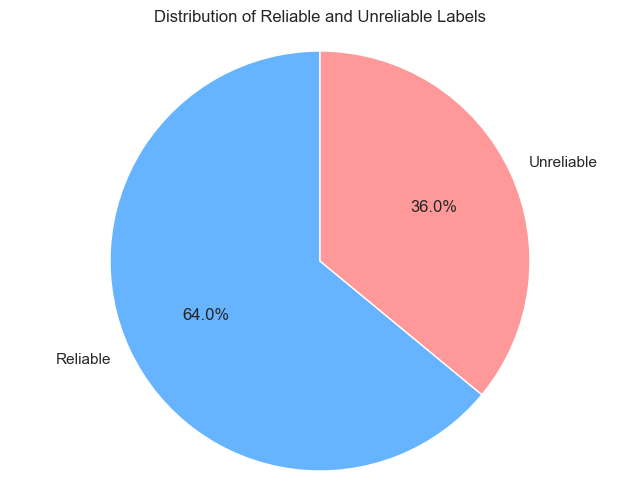

In [39]:
label_counts = df['Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=['Reliable', 'Unreliable'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Reliable and Unreliable Labels')
plt.axis('equal')  
plt.show()


In [40]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01) 
outlier_scores = iso.fit_predict(df)
outliers = (outlier_scores == -1)

C:\Users\SİNAN-PC\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


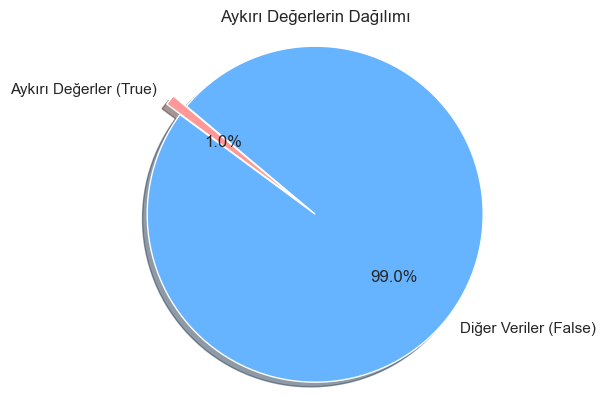

In [41]:
outliers=outliers.astype(int)
num_true = np.count_nonzero(outliers)
num_false = len(outliers) - num_true

labels = ["Outliers(True)","Non Outliers(False)"]
sizes = [num_true, num_false]

colors = ['#ff9999','#66b3ff']  
explode = (0.1, 0)  

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140, shadow=True)

plt.title("Outliers")

plt.axis('equal')  
plt.show()

In [42]:
outliers=pd.DataFrame(outliers)
drop_index=outliers[outliers[0]==1]


In [43]:
df = df.drop(outliers[outliers[0]==1].index)
len(df)

3755

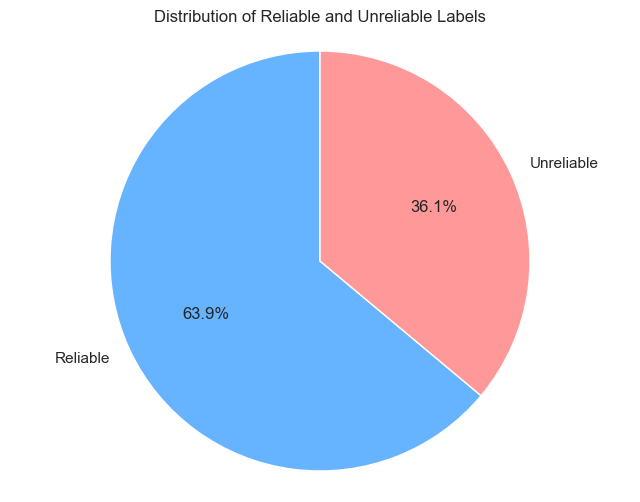

In [44]:
label_counts = df['Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=['Reliable', 'Unreliable'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Reliable and Unreliable Labels')
plt.axis('equal')  
plt.show()


In [50]:
from imblearn.over_sampling import BorderlineSMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
df=df.drop("Average_Word_Length",axis=1)
df.head()

,Word_Count,Number_of_Sentence,Unique_Words,Percantage_of_Uniquies,average_sentence_length,Label
0,39,5,16,41.025641,12.820513,1
1,69,7,15,21.739130,10.144928,1
2,85,5,25,29.411765,5.882353,1
3,94,5,25,26.595745,5.319149,1
4,27,5,23,85.185185,18.518519,1


In [51]:
y=df["Label"]
X=df.drop("Label",axis=1)
randomseed=42
X=X.values
X=pt.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=randomseed)
smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from time import time
model_borderline=GradientBoostingClassifier()
model_borderline.fit(X_train_resampled , y_train_resampled)
y_pred=model_borderline.predict(X_test)

In [53]:
import time
evaluate_model(model_borderline,X_test,y_test,model_name="model with borderline smote")

{'model_name': 'model with borderline smote',
 'accuracy': 0.917,
 'precision': 0.823,
 'recall': 0.994,
 'f1_score': 0.9,
 'latency': 2.3}

In [54]:
y=df["Label"]
X=df.drop("Label",axis=1)
randomseed=42
X=X.values
X=pt.fit_transform(X)
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=42) 
X_resampled, y_resampled = adasyn.fit_resample(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.33,random_state=randomseed)
model_adasyn=GradientBoostingClassifier()
model_adasyn.fit(X_train,y_train)
y_pred_adasyn=model_adasyn.predict(X_test)
evaluate_model(model_adasyn,X_test,y_test,model_name="model with adasyn smote")

{'model_name': 'model with adasyn smote',
 'accuracy': 0.928,
 'precision': 0.882,
 'recall': 0.998,
 'f1_score': 0.936,
 'latency': 2.0}

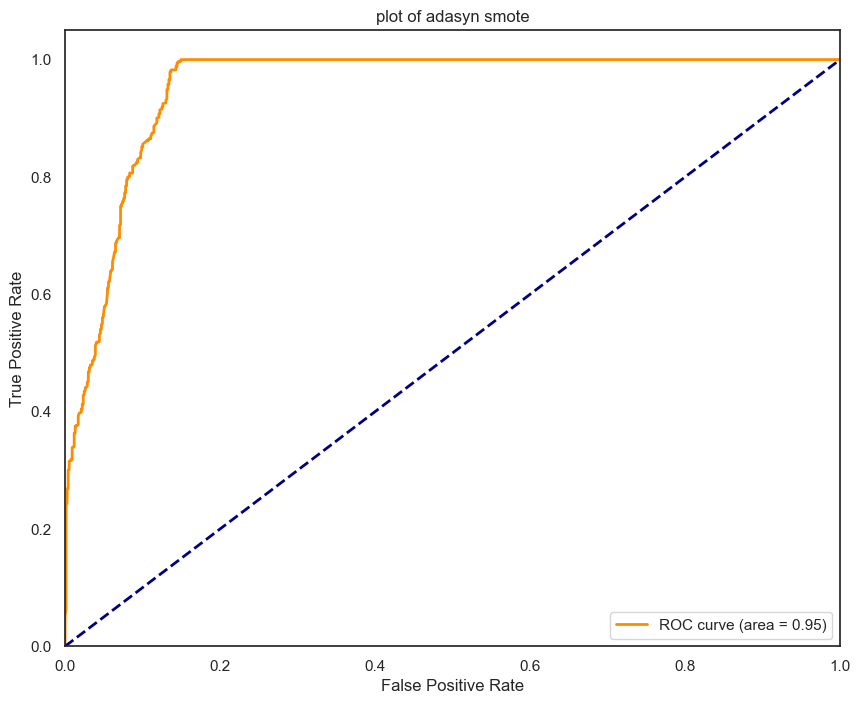

In [55]:
plot_roc_curve(model_adasyn,X_test,y_test,"plot of adasyn smote")

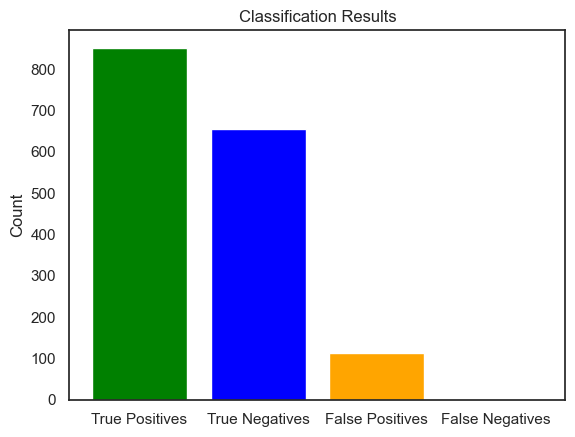

In [62]:
import matplotlib.pyplot as plt
import numpy as np


TP=cm_of_adasyn[1,1]  
TN=cm_of_adasyn[0,0]  
FP=cm_of_adasyn[0,1]  
FN=cm_of_adasyn[1,0]  


labels=["True Positives","True Negatives","False Positives","False Negatives"]
values=[TP,TN,FP,FN]

plt.bar(labels,values,color=["green","blue","orange","red"])
plt.ylabel("Count")
plt.title("Classification Results")
plt.show()


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

model = GradientBoostingClassifier(n_iter_no_change=5, validation_fraction=0.1, tol=0.01)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

grid_search = GridSearchCV(estimator=model_adasyn, param_grid=param_grid, 
                          scoring='f1', cv=3, n_jobs=-1)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Params:", best_params)
print("Best F1 Score", best_score)


y_pred_adasyn = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_adasyn)
precision = precision_score(y_test, y_pred_adasyn)
recall = recall_score(y_test, y_pred_adasyn)
f1 = f1_score(y_test, y_pred_adasyn)
latency = (end_time - start_time) / len(y_boxC_test) * 1000  

print(f"Accuracy: {accuracy:.3f}/ Precision: {precision:.3f}/ Recall: {recall:.3f}/ Latency: {latency:.1f}ms / F1_score : {f1:.3f}")


Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best F1 Score 0.9399813347606991
Accuracy: 0.928/ Precision: 0.880/ Recall: 1.000/ Latency: 2.6ms / F1_score : 0.936


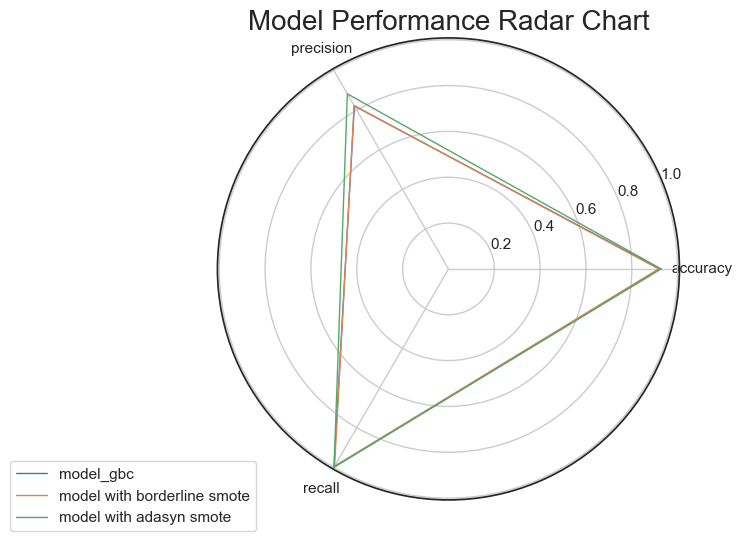

In [73]:
from math import pi

categories = model_performance.columns[1:4] 
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i in range(len(model_performance)):  
    values = model_performance.iloc[i, 1:4].values.flatten().tolist()
    values += values[:1]  
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=model_performance["model_name"][i])

plt.xticks(angles[:-1], categories)

plt.title('Model Performance Radar Chart', fontsize=20)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()



In [79]:
model_performance

,model_name,accuracy,precision,recall,f1_score,latency
0,model_gbc,0.923,0.821,0.999,0.901,4.0
1,model with borderline smote,0.917,0.823,0.994,0.900,2.3
2,model with adasyn smote,0.928,0.882,0.998,0.936,2.0
